In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("Frame Selection/dataset.csv")
df

,tag_id,image_id,frame,segmentation,timestamp,user
0,84f6ac8a-39b8-46a0-9572-432ab85dffb4,131aedfhs6pnf1fvtvp49mjf02x1fl1f22,38,eJztne1is7YSBkmcvE7u/4bb2E5sQEK7Qrta0MyfnmAM6p...,2024-01-24 16:02:32.568104,lekandnow@gmail.com
1,4f573378-1388-46de-951b-95f1e44d390e,131aedfhs6pnf1fvtvp49mjf04wc7y5722,23,eJztnel6o7oSALmZLJ73f+FznWQSQFu31C2EVPVrYrPNV4...,2024-01-24 16:02:32.638365,lekandnow@gmail.com
2,09d328c9-8b75-464e-a68d-f30dd9db2499,131aedfhs6pnf1fvtvp49mjf04y0vtqu22,36,eJztnel2o7gWRulyust5/xe+1xlsBknoTBrM3j96pYMBZe...,2024-01-24 16:02:32.616167,lekandnow@gmail.com
3,b83370d1-4bbb-44f5-ad75-8f8f6b572836,131aedfhs6pnf1fvtvp49mk5l3qcg5hh22,18,eJztne1im7oSAJWe49O67//A9+LEtgAB+tjVrqyZP20dG0...,2024-01-24 16:13:02.512389,lekandnow@gmail.com
4,222454ee-2b93-4854-ad91-5d37147ac04e,131aedfhs6pnf1fvtvp49mk5l3ra0gpr22,21,eJztnVl2pDgQAHGX7Zmu+x94pnZAW0ogKaWM+GvbDfhFlA...,2024-01-24 16:13:02.879827,lekandnow@gmail.com
...,...,...,...,...,...,...
1349,20a157b9-9e37-4c98-be0f-ad8de7500e98,13c2ur549vohc0jat2dvu3xs0c1,20,eJzt3N1um0oAhVGrwX7/Rz7qaZomMPwMBjOevdZNL0IsrG...,2022-12-21 15:57:26.939252,sgurba@gmail.com
1350,ccee2841-9bbf-47ab-b0df-2fb65be95751,13c2ur549vohc0jat2dvu3xs2y1,24,eJzt3dtyGjsARFEXY/P/n3zKPk6wGWmugCL1Ws+hLLKbIW...,2022-12-21 15:57:26.987265,sgurba@gmail.com
1351,8f393fb5-7030-4518-9cd7-8c7ca0eeafce,13c2ur549vohc0jat2dvu3xs7q1,18,eJzt3dty20gSRVEG7enR/3/xDO22whJxKQBZALJyrce2zC...,2022-12-21 15:57:27.042089,sgurba@gmail.com
1352,e50dfcfb-dff2-438c-8305-b532b8dde8fd,13c2ur549vohc0jat2dvu3xs9w1,23,eJzt2wtO40gARdEM2L3/JY9QT2fIv0M+Jdc9ZwGopPuwHQ...,2022-12-21 15:57:27.042659,sgurba@gmail.com


In [3]:
indexes = df[df['image_id'] == '131aedfhs6pnf1fvtvp49mk5l3ra0gpr22']
indexes = indexes.reset_index(drop=True)
indexes

,tag_id,image_id,frame,segmentation,timestamp,user
0,222454ee-2b93-4854-ad91-5d37147ac04e,131aedfhs6pnf1fvtvp49mk5l3ra0gpr22,21,eJztnVl2pDgQAHGX7Zmu+x94pnZAW0ogKaWM+GvbDfhFlA...,2024-01-24 16:13:02.879827,lekandnow@gmail.com
1,df438d6d-6e3d-4c31-8de0-d2519343a847,131aedfhs6pnf1fvtvp49mk5l3ra0gpr22,21,eJztnVl2pDgQAHGX7Zmu+x94pnZAW0ogKaWM+GvbDfhFlA...,2023-06-17 17:04:54.715619,lekandnow@gmail.com
2,e32f308e-efbd-4fab-b797-f84ed10a8613,131aedfhs6pnf1fvtvp49mk5l3ra0gpr22,13,eJzt3dti2zgSRVE6lvT/n9yti22JBAmAJFBVOHs9zrQtxv...,2023-05-30 20:19:10.355135,sgurba@gmail.com


In [4]:
first_seg = indexes.iloc[0]['segmentation']

In [5]:
import zlib
import numpy as np
import base64

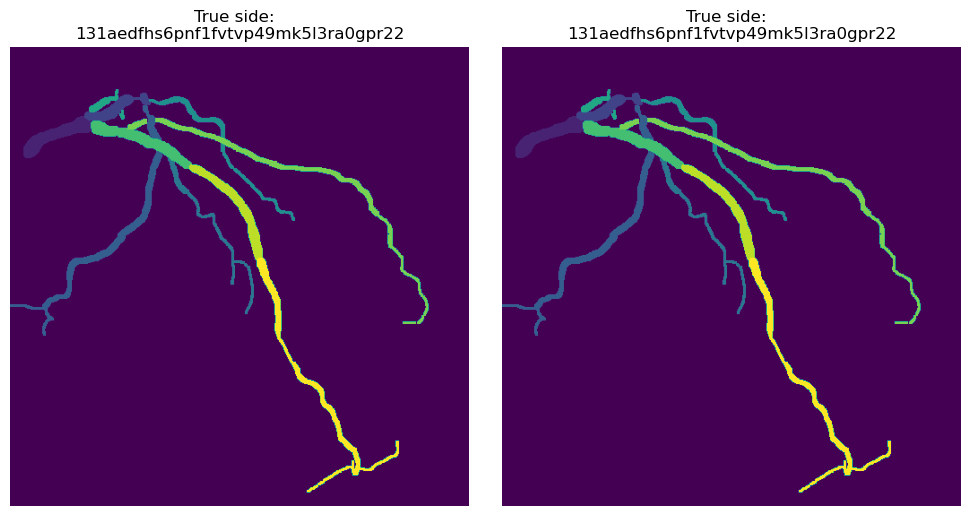

In [6]:
plt.figure(figsize=(10, 10))
height, width = 512, 512

for i in range(2):
    plt.subplot(2,2, i+1)
    first_seg = indexes.loc[i, 'segmentation']
    decoded_data = base64.b64decode(first_seg)
    decompressed_data = zlib.decompress(decoded_data)
    mask = np.frombuffer(decompressed_data, dtype=np.uint8).reshape(height, width)
    plt.imshow(mask)
    plt.axis('off')
    title = "True side: "
    # title += "RCA" if indexes.loc[i, 'SIDE'] == 1.0 else "LCA"
    title += f" \n{indexes.loc[i, 'image_id']}"
    plt.title(title)

plt.tight_layout()
plt.show()

In [7]:
decoded_data = base64.b64decode(first_seg)

decompressed_data = zlib.decompress(decoded_data)

height, width = 512, 512
len(decompressed_data)
type(decompressed_data)
mask = np.frombuffer(decompressed_data, dtype=np.uint8).reshape(height, width)

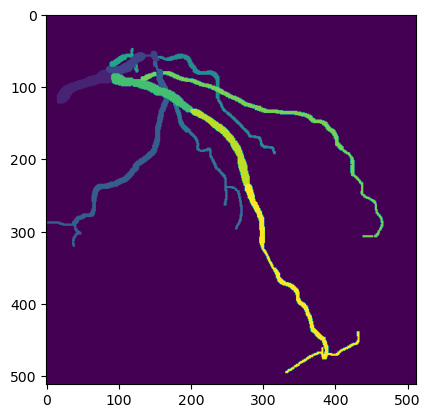

In [8]:
plt.imshow(mask)

In [9]:
import cv2

In [10]:
_, binary_mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

In [11]:
cv2.imshow("Semanitc mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
cv2.imshow('Binary mask', binary_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

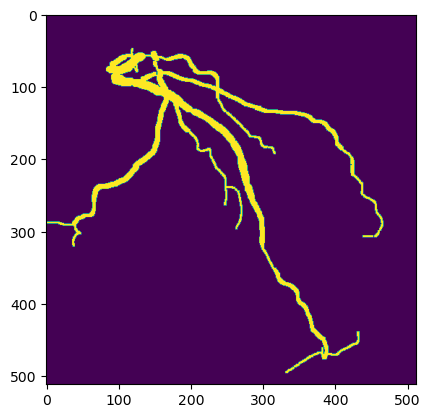

In [13]:
plt.imshow(binary_mask)

In [14]:
masks = df['segmentation']
decoded_series = masks.apply(lambda x: base64.b64decode(x))
decompressed_series = decoded_series.apply(lambda x: zlib.decompress(x))

In [16]:
def mask_to_binary(mask_data, height=512, width=512):
    mask = np.frombuffer(mask_data, dtype=np.uint8).reshape(height, width)
    
    _, binary_mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)    
    return binary_mask

In [17]:
serie_filtr = decompressed_series[decompressed_series.apply(len) == 262144]

In [18]:
bms = serie_filtr.apply(lambda x: mask_to_binary(x))

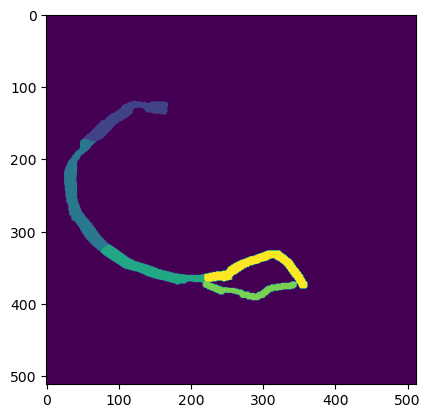

In [19]:
height, width = 512, 512
len(decompressed_data)
type(decompressed_data)
mask = np.frombuffer(decompressed_series[100], dtype=np.uint8).reshape(height, width)
plt.imshow(mask)

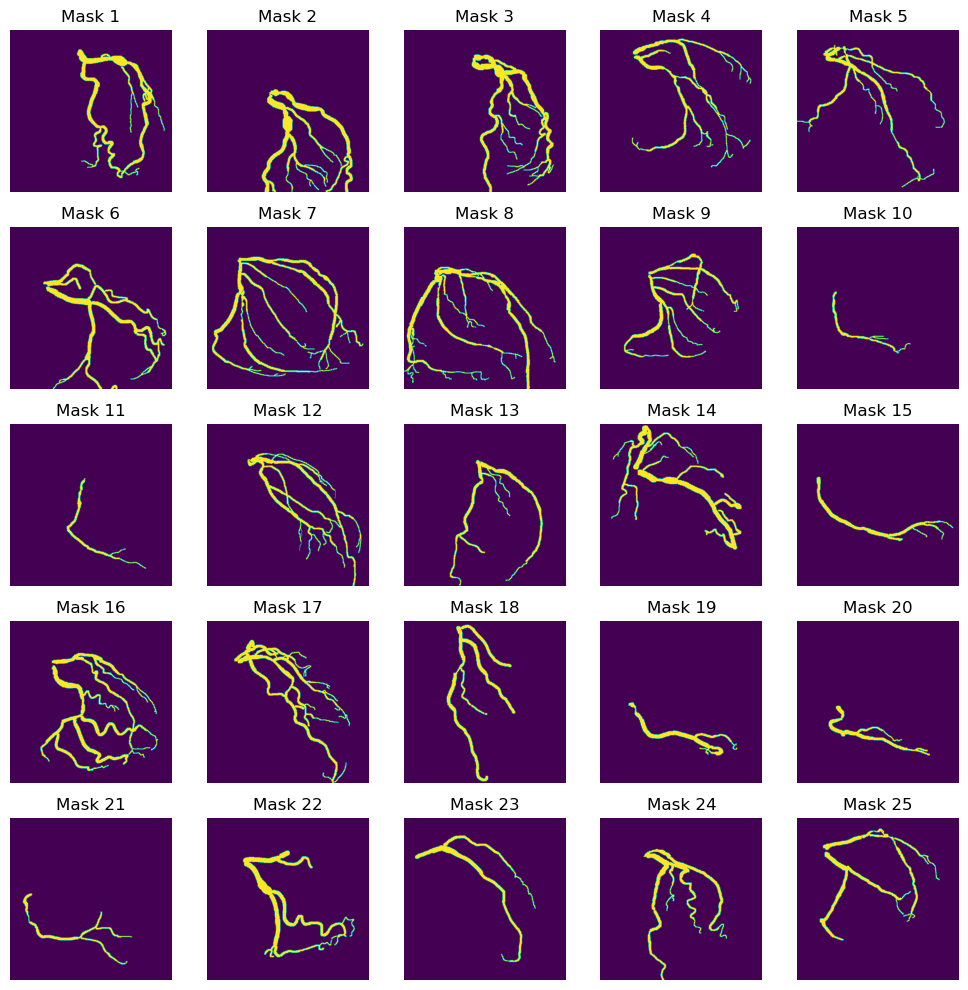

In [21]:
plt.figure(figsize=(10, 10))  # Ustawienie wielkości obrazu

# Wyświetl każdą maskę w osobnym wierszu
for i in range(25):
    plt.subplot(5, 5, i+1)  # Ustawienie wiersza, kolumny i numeru podobrazu
    plt.imshow(bms[i])
    plt.axis('off')  # Wyłączenie osi
    plt.title(f'Mask {i+1}')  # Dodanie tytułu

plt.tight_layout()  # Dopasowanie układu
plt.show()

In [22]:
new_df = pd.DataFrame()
new_df['image_id'] = df['image_id']
new_df

,image_id
0,131aedfhs6pnf1fvtvp49mjf02x1fl1f22
1,131aedfhs6pnf1fvtvp49mjf04wc7y5722
2,131aedfhs6pnf1fvtvp49mjf04y0vtqu22
3,131aedfhs6pnf1fvtvp49mk5l3qcg5hh22
4,131aedfhs6pnf1fvtvp49mk5l3ra0gpr22
...,...
1349,13c2ur549vohc0jat2dvu3xs0c1
1350,13c2ur549vohc0jat2dvu3xs2y1
1351,13c2ur549vohc0jat2dvu3xs7q1
1352,13c2ur549vohc0jat2dvu3xs9w1


In [23]:
imagefb = pd.read_csv("imagefeedback.csv", delimiter=";")

In [24]:
merged = pd.merge(df, imagefb, left_on='image_id', right_on='IMAGE_ID', how='inner')
merged

,tag_id,image_id,frame_x,segmentation,timestamp,user,ID,CREATEDBY,CREATEDON,IMAGE_ID,SEGMENTATION_ID,DONE,studyFeedback_id,frame_y,SIDE
0,84f6ac8a-39b8-46a0-9572-432ab85dffb4,131aedfhs6pnf1fvtvp49mjf02x1fl1f22,38,eJztne1is7YSBkmcvE7u/4bb2E5sQEK7Qrta0MyfnmAM6p...,2024-01-24 16:02:32.568104,lekandnow@gmail.com,84f6ac8a-39b8-46a0-9572-432ab85dffb4,lekandnow@gmail.com,2024-01-24 17:02,131aedfhs6pnf1fvtvp49mjf02x1fl1f22,84f6ac8a-39b8-46a0-9572-432ab85dffb4,0,10a63c04-29dc-4532-bea0-e223acb045a2,38,0.0
1,84f6ac8a-39b8-46a0-9572-432ab85dffb4,131aedfhs6pnf1fvtvp49mjf02x1fl1f22,38,eJztne1is7YSBkmcvE7u/4bb2E5sQEK7Qrta0MyfnmAM6p...,2024-01-24 16:02:32.568104,lekandnow@gmail.com,e92adb51-d171-44d6-938c-3c01cbf9d627,sgurba@gmail.com,2024-01-23 22:15,131aedfhs6pnf1fvtvp49mjf02x1fl1f22,e92adb51-d171-44d6-938c-3c01cbf9d627,0,62c49835-a783-4583-b9db-0a4174280451,27,0.0
2,4f573378-1388-46de-951b-95f1e44d390e,131aedfhs6pnf1fvtvp49mjf04wc7y5722,23,eJztnel6o7oSALmZLJ73f+FznWQSQFu31C2EVPVrYrPNV4...,2024-01-24 16:02:32.638365,lekandnow@gmail.com,4f573378-1388-46de-951b-95f1e44d390e,lekandnow@gmail.com,2024-01-24 17:02,131aedfhs6pnf1fvtvp49mjf04wc7y5722,4f573378-1388-46de-951b-95f1e44d390e,0,10a63c04-29dc-4532-bea0-e223acb045a2,23,0.0
3,4f573378-1388-46de-951b-95f1e44d390e,131aedfhs6pnf1fvtvp49mjf04wc7y5722,23,eJztnel6o7oSALmZLJ73f+FznWQSQFu31C2EVPVrYrPNV4...,2024-01-24 16:02:32.638365,lekandnow@gmail.com,a7c73022-e010-41e8-89a0-80acecd7d60d,sgurba@gmail.com,2023-05-28 19:54,131aedfhs6pnf1fvtvp49mjf04wc7y5722,a7c73022-e010-41e8-89a0-80acecd7d60d,0,62c49835-a783-4583-b9db-0a4174280451,19,0.0
4,09d328c9-8b75-464e-a68d-f30dd9db2499,131aedfhs6pnf1fvtvp49mjf04y0vtqu22,36,eJztnel2o7gWRulyust5/xe+1xlsBknoTBrM3j96pYMBZe...,2024-01-24 16:02:32.616167,lekandnow@gmail.com,09d328c9-8b75-464e-a68d-f30dd9db2499,lekandnow@gmail.com,2024-01-24 17:02,131aedfhs6pnf1fvtvp49mjf04y0vtqu22,09d328c9-8b75-464e-a68d-f30dd9db2499,0,10a63c04-29dc-4532-bea0-e223acb045a2,36,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,e50dfcfb-dff2-438c-8305-b532b8dde8fd,13c2ur549vohc0jat2dvu3xs9w1,23,eJzt2wtO40gARdEM2L3/JY9QT2fIv0M+Jdc9ZwGopPuwHQ...,2022-12-21 15:57:27.042659,sgurba@gmail.com,f913e59b-e3e6-4a2f-9a9b-5bf38d771720,machnikandrzej@gmail.com,2022-12-12 19:43,13c2ur549vohc0jat2dvu3xs9w1,NaN,0,75721a3e-36f1-4515-b33c-1efb375b901a,27,NaN
2470,f6735254-7dd5-4c16-90bc-06336548551a,13c2ur549vohc0jat2dvu3xsdd1,26,eJzt2ttyo0YARVGVItnz/1+cKnuSsqFBNDSC5qz1GCsSrn...,2022-12-21 15:57:27.043237,sgurba@gmail.com,2b56a441-277c-46c7-be61-4b4cd3ed3406,barteknawrotek@gmail.com,2023-01-01 13:39,13c2ur549vohc0jat2dvu3xsdd1,2b56a441-277c-46c7-be61-4b4cd3ed3406,0,54ea72be-865b-483a-990e-e9b6c50afe7b,26,NaN
2471,f6735254-7dd5-4c16-90bc-06336548551a,13c2ur549vohc0jat2dvu3xsdd1,26,eJzt2ttyo0YARVGVItnz/1+cKnuSsqFBNDSC5qz1GCsSrn...,2022-12-21 15:57:27.043237,sgurba@gmail.com,7502feff-8f8a-4129-84ad-6b2ed3ebb3f5,sgurba@gmail.com,2023-12-30 19:08,13c2ur549vohc0jat2dvu3xsdd1,7502feff-8f8a-4129-84ad-6b2ed3ebb3f5,0,17c10528-d8f6-44e4-ac59-197b2264f6f4,26,0.0
2472,f6735254-7dd5-4c16-90bc-06336548551a,13c2ur549vohc0jat2dvu3xsdd1,26,eJzt2ttyo0YARVGVItnz/1+cKnuSsqFBNDSC5qz1GCsSrn...,2022-12-21 15:57:27.043237,sgurba@gmail.com,ac9c600e-1950-4ce0-a900-9b0e9c7d8f8f,machnikandrzej@gmail.com,2022-12-12 19:43,13c2ur549vohc0jat2dvu3xsdd1,NaN,0,75721a3e-36f1-4515-b33c-1efb375b901a,26,NaN


In [25]:
new_df['side'] = merged['SIDE']
new_df['segmentation'] = merged['segmentation']
new_df

,image_id,side,segmentation
0,131aedfhs6pnf1fvtvp49mjf02x1fl1f22,0.0,eJztne1is7YSBkmcvE7u/4bb2E5sQEK7Qrta0MyfnmAM6p...
1,131aedfhs6pnf1fvtvp49mjf04wc7y5722,0.0,eJztne1is7YSBkmcvE7u/4bb2E5sQEK7Qrta0MyfnmAM6p...
2,131aedfhs6pnf1fvtvp49mjf04y0vtqu22,0.0,eJztnel6o7oSALmZLJ73f+FznWQSQFu31C2EVPVrYrPNV4...
3,131aedfhs6pnf1fvtvp49mk5l3qcg5hh22,0.0,eJztnel6o7oSALmZLJ73f+FznWQSQFu31C2EVPVrYrPNV4...
4,131aedfhs6pnf1fvtvp49mk5l3ra0gpr22,0.0,eJztnel2o7gWRulyust5/xe+1xlsBknoTBrM3j96pYMBZe...
...,...,...,...
1349,13c2ur549vohc0jat2dvu3xs0c1,0.0,eJzt3dti2zYQRVE2tOv8/xe3lmNHF5DEZQbAHOz12kaiso...
1350,13c2ur549vohc0jat2dvu3xs2y1,0.0,eJzt3dt22zYQRmE2Umq//xM3TprEpkhiDgAGnNnfZatI8t...
1351,13c2ur549vohc0jat2dvu3xs7q1,0.0,eJzt3dt22zYQRmE2Umq//xM3TprEpkhiDgAGnNnfZatI8t...
1352,13c2ur549vohc0jat2dvu3xs9w1,1.0,eJzt19tS4zgARdF0Av//ywPTPVM0yLnYknU5a73xklJ5Hz...
